# Healthcare - NLP-LLM usecase to extract data and create structured insights from unstructured data.

In this example we will be extracting text from medical history images and create medical insights and summary from it. 

### Business problem
The capability to extract information from care notes and organize it as inputs for downstream systems has the potential to enhance both the range and effectiveness of the systems. This improvement could lead to more robust and actionable recommendations for clinicians, offering a form of "augmented intelligence" that is a struggle to deliver in real-world scenarios. Such advancements have the capacity to significantly influence not only the quality of care within hospitals but also to reshape the paradigm of how care is administered, particularly in terms of the integration of ML/AI tools.

### Architecture
![architecture diagram](arch.png)

Text extraction from documents is a crucial aspect when it comes to processing documents with LLMs. Document packages like healthcare/medical triage/history consist of complex forms that contain a lot of information across structured, semi-structured, and unstructured formats. We can use Amazon Textract to extract unstructured raw text from documents and preserve the original semi-structured or structured objects like key-value pairs and tables present in the document. 

We will be leveraging prompt engineering technique on Claude model available in Amazon Bedrock to help summarize the clinical notes/medical history in the required format. 

## Installation of necessary Library

In [4]:
!python -m pip install amazon-textract-caller --upgrade
!python -m pip install amazon-textract-response-parser --upgrade

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [5]:
!pip install  --force-reinstall boto3

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 341.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 184.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 166.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 325.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: jmespath
    Found existing installation: jmespath 1.0.1
    Uninstalling jmespath-1.0.1:
      Successfully uninstalled jmespath-1.0.1
  Attempting uninstall: python-dateutil
    Found existin

## Initial Set up 

In [6]:
import sagemaker
import boto3

import numpy as np                                # For performing matrix operations and numerical processing
import pandas as pd                               # For manipulating tabular data
from time import gmtime, strftime
import os

region = boto3.Session().region_name
smclient = boto3.Session().client('sagemaker')

In [7]:
from IPython.display import Image, display
from trp import Document
from PIL import Image as PImage, ImageDraw
import time
from IPython.display import IFrame

In [8]:
# Amazon S3 client
s3 = boto3.client('s3')

# Amazon Textract client
textract = boto3.client('textract')

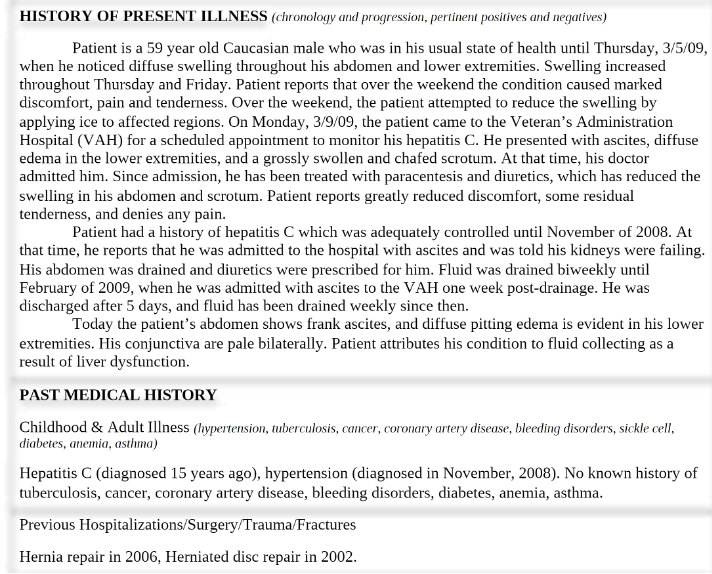

In [9]:
documentName = "hp1.png"
display(Image(filename=documentName))

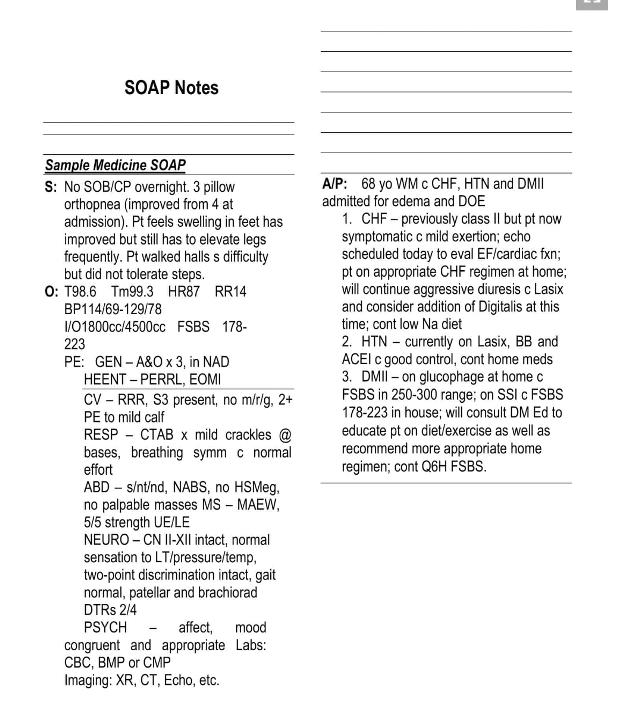

In [10]:
documentName1 = "hp2.png"
display(Image(filename=documentName1))

In [11]:
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

# Print detected text
text = ""
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])
        text = text + " " + item["Text"]


HISTORY OF PRESENT ILLNESS (chronology and progression, pertinent positives and negatives)
Patient is a 59 year old Caucasian male who was in his usual state of health until Thursday, 3/5/09,
when he noticed diffuse swelling throughout his abdomen and lower extremities. Swelling increased
throughout Thursday and Friday. Patient reports that over the weekend the condition caused marked
discomfort, pain and tenderness. Over the weekend, the patient attempted to reduce the swelling by
applying ice to affected regions. On Monday, 3/9/09, the patient came to the Veteran's Administration
Hospital (VAH) for a scheduled appointment to monitor his hepatitis C. He presented with ascites, diffuse
edema in the lower extremities, and a grossly swollen and chafed scrotum. At that time, his doctor
admitted him. Since admission, he has been treated with paracentesis and diuretics, which has reduced the
swelling in his abdomen and scrotum. Patient reports greatly reduced discomfort, some residual
tende

In [12]:
# Read document content
with open(documentName1, 'rb') as document1:
    imageBytes1 = bytearray(document1.read())

# Call Amazon Textract
response1 = textract.detect_document_text(Document={'Bytes': imageBytes1})

# Print detected text
text1 = ""
for item in response1["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])
        text1 = text1 + " " + item["Text"]


SOAP Notes
Sample Medicine SOAP
S: No SOB/CP overnight. 3 pillow
A/P: 68 yo WM C CHF, HTN and DMII
orthopnea (improved from 4 at
admitted for edema and DOE
admission). Pt feels swelling in feet has
1. CHF - previously class II but pt now
improved but still has to elevate legs
symptomatic C mild exertion; echo
frequently. Pt walked halls S difficulty
scheduled today to eval EF/cardiac fxn;
but did not tolerate steps.
pt on appropriate CHF regimen at home;
O: T98.6 Tm99.3 HR87 RR14
will continue aggressive diuresis C Lasix
BP114/69-129/78
and consider addition of Digitalis at this
I/O1800cc/4500cc FSBS 178-
time; cont low Na diet
223
2. HTN - currently on Lasix, BB and
PE: GEN - A&O X 3, in NAD
ACEI C good control, cont home meds
HEENT - PERRL, EOMI
3. DMII - on glucophage at home C
CV - RRR, S3 present, no m/r/g, 2+
FSBS in 250-300 range; on SSI C FSBS
PE to mild calf
178-223 in house; will consult DM Ed to
RESP - CTAB X mild crackles @
educate pt on diet/exercise as well as
bases, brea

In [13]:
# Connect to the Bedrock runtime client in us-east-1
bedrock_runtime =boto3.client(service_name='bedrock-runtime',
                                    region_name='us-east-1')

In [14]:
prompt_template = """
 \n\nHuman: You are a medical practitioner writing a Medical Summary of the history of present illness and comorbidities from past medical history. \n \n
{input_text}
 \n
 
Write a medical Summary of the above medical history. \n \n
Use short bullet points. \n\n

- what is the Chief complaint and Length of Symptom?
- What is the treatment plan and progress for that plan?
- What are the Comorbidities?
- What is the medical social history details?
Assistant:
"""

In [15]:
def format_str(s):
    prompt = prompt_template.replace("{input_text}", s) 
    return prompt

prompt_query=format_str(text)
  
print(prompt_query)


 

Human: You are a medical practitioner writing a Medical Summary of the history of present illness and comorbidities from past medical history. 
 

 HISTORY OF PRESENT ILLNESS (chronology and progression, pertinent positives and negatives) Patient is a 59 year old Caucasian male who was in his usual state of health until Thursday, 3/5/09, when he noticed diffuse swelling throughout his abdomen and lower extremities. Swelling increased throughout Thursday and Friday. Patient reports that over the weekend the condition caused marked discomfort, pain and tenderness. Over the weekend, the patient attempted to reduce the swelling by applying ice to affected regions. On Monday, 3/9/09, the patient came to the Veteran's Administration Hospital (VAH) for a scheduled appointment to monitor his hepatitis C. He presented with ascites, diffuse edema in the lower extremities, and a grossly swollen and chafed scrotum. At that time, his doctor admitted him. Since admission, he has been treated wit

In [16]:
import json
body = json.dumps({
                    "prompt": prompt_query,
                    "max_tokens_to_sample":4096,
                   # "temperature":0.5,
                    #"top_k":250,
                    #"top_p":0.5,
                    "stop_sequences": ["\n\nHuman:"]
                  }) 

In [17]:
modelId = 'anthropic.claude-v2' # change this to use a different version from the model provider
accept = 'application/json'
contentType = 'application/json'

response = bedrock_runtime.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())

print(response_body.get('completion'))

 Here is a medical summary in bulleted format based on the provided history:

Chief Complaint and Duration:
- Diffuse swelling in abdomen, lower extremities, and scrotum since Thursday 3/5/09 (4 days)

Treatment Plan and Progress:
- Admitted 3/9/09 for paracentesis and diuretics 
- Reduced swelling in abdomen and scrotum, reduced discomfort and tenderness

Comorbidities:
- Hepatitis C (diagnosed 15 years ago) 
- Hypertension (diagnosed November 2008)
- Prior ascites and lower extremity edema due to liver dysfunction (November 2008 and February 2009 hospitalizations)

Medical/Social History:  
- No history of TB, cancer, CAD, bleeding disorders, diabetes, anemia, asthma
- Hernia repair in 2006
- Herniated disc repair in 2002
- Veteran who receives care through VA system


In [18]:
prompt_template1 = """
 \n\nHuman: You are a medical practitioner revieweing the patient's Medical SOAP notes \n \n
{input_text}
 \n
 
Write a medical Summary of the above medical SOAP notes. \n \n
Use short bullet points. \n\n

- what is the overall progress in patient course?
- How are the patient's symptoms?
- Provide any improvement in patient's health and any recommendation for next step or medication
Assistant:
"""

In [19]:
def format_str1(s):
    prompt1 = prompt_template1.replace("{input_text}", s) 
    return prompt1



In [20]:
prompt_query1=format_str1(text1)
  
print(prompt_query1)


 

Human: You are a medical practitioner revieweing the patient's Medical SOAP notes 
 

 SOAP Notes Sample Medicine SOAP S: No SOB/CP overnight. 3 pillow A/P: 68 yo WM C CHF, HTN and DMII orthopnea (improved from 4 at admitted for edema and DOE admission). Pt feels swelling in feet has 1. CHF - previously class II but pt now improved but still has to elevate legs symptomatic C mild exertion; echo frequently. Pt walked halls S difficulty scheduled today to eval EF/cardiac fxn; but did not tolerate steps. pt on appropriate CHF regimen at home; O: T98.6 Tm99.3 HR87 RR14 will continue aggressive diuresis C Lasix BP114/69-129/78 and consider addition of Digitalis at this I/O1800cc/4500cc FSBS 178- time; cont low Na diet 223 2. HTN - currently on Lasix, BB and PE: GEN - A&O X 3, in NAD ACEI C good control, cont home meds HEENT - PERRL, EOMI 3. DMII - on glucophage at home C CV - RRR, S3 present, no m/r/g, 2+ FSBS in 250-300 range; on SSI C FSBS PE to mild calf 178-223 in house; will consul

In [21]:
import json
body1 = json.dumps({
                    "prompt": prompt_query1,
                    "max_tokens_to_sample":4096,
                   # "temperature":0.5,
                    #"top_k":250,
                    #"top_p":0.5,
                    "stop_sequences": ["\n\nHuman:"]
                  }) 

In [22]:
response1 = bedrock_runtime.invoke_model(body=body1, modelId=modelId, accept=accept, contentType=contentType)
response_body1 = json.loads(response1.get('body').read())

print(response_body1.get('completion'))

 Here is a summary of the key points from the SOAP notes:

- 68 year old male with congestive heart failure (CHF), hypertension (HTN), and diabetes mellitus type 2 (DMII) admitted for edema and shortness of breath (SOB)

- CHF symptoms improved with aggressive diuresis (Lasix) and leg elevation, but still has orthopnea. Echo scheduled to evaluate heart function. 

- HTN well-controlled on current medications (Lasix, beta blocker, ACE inhibitor). Continue current regimen.  

- DMII - blood sugar elevated (250-300 range). Consult diabetes education and recommend adjustments to home medication regimen.

- Overall: Progress being made on diuresis for CHF. Continue current treatments and medication adjustments as noted above. Further testing (echo) to determine if additional medications warranted (e.g. digitalis).
